# V3: Filter and Visualize

### Histogram: 

* Pyplot provides hist(), which takes a Series and plots a histogram. That is, it shows the values and how often they appear.
* Pyplot doesn't work with NaNs... So, we have to use dropna(), which makes a new Series that contains only the valid values.
* bins in pyplot gives intervals between which weights will be divided. 

* hist() takes other arguments that specify the type and appearances of the histograms; you will have a chance to explore these options in the next exercise. 
        
        import matplotlib.pyplot as plt
        plt.hist(birth_weight.dropna(), bins=30) 
        
        plt.xlabel('Birth weight(lb)' )
        plt.ylabel('Fraction of births')
        
        plt.show()


 ### Boolean Series:
 
* When we compare a series to a value, the result will be a Boolean Series. That is, each element is a boolean value.
* In below example, it is True for each preterm baby.

      preterm = nsfg['prlngth'] < 37
      preterm.head()

* If we compute the sum of a Boolean Series, it treats True as 1 and False as 0. It will give us total values where baby is preterm.

      preterm.sum()
    O/P: 3742
    
* Mean: This will give us the fraction of Trues:
        
      preterm.mean()
      
     O/P: 0.399
     
     * It means that around 40% of baby are preterm.
     
## Filtering: 

We can use Boolean series as Filter. That is, we can select only rows that satisfy a condition or meet some criterion. 

    preterm_weight = birth_weight[preterm]
    
    preterm_weight.mean()
    
* Here we are finding the weight of perterm babies. And finding their mean weigth.
* To find the full term babies: 
    
        full_term_weight = birth_weight[~preterm]
        full_term_weight.mean()
        
#### Using logical operators in Filtering:

* Other logical Operators:
    * & for AND (both must be true)
    * | for OR (either or both can be true )
    
## Resampling: 

* NSFG is not representative.
* Some groups are 'oversampled'
* To get reliable statistics, but it makes the analysis a little more complicated.
* We can correct OVERSAMPLING by RESAMPLING.
    * resample_rows_weighted() # This sample function is provided for resampling here in this course.
    * To find more on this, check Course on Statistics.
   

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
<class 'pandas.core.series.Series'>


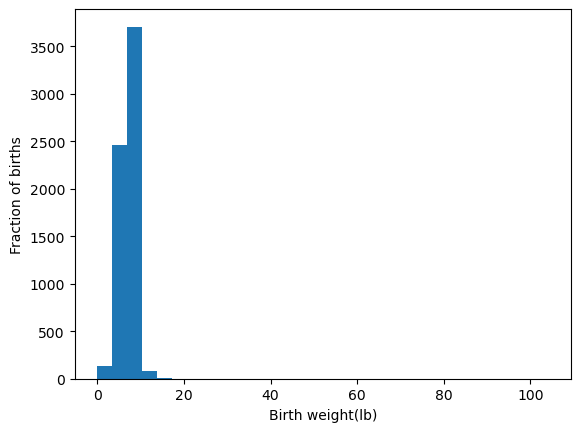

Preterm baby avg Wt:  5.602043673012318
Full term baby avg wt: 7.422858312113496


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nsfg = pd.read_hdf('nsfg.hdf5')

print(nsfg.columns) 

birth_weight = nsfg['birthwgt_lb1'] + nsfg['birthwgt_oz1']/16

birth_weight.replace([98, 99], np.nan, inplace = True)

print(type(birth_weight))

plt.hist(birth_weight.dropna(), bins=30) 
        
plt.xlabel('Birth weight(lb)')
plt.ylabel('Fraction of births')
        
plt.show()

preterm = nsfg['prglngth'] < 37
preterm.head()
preterm_weight = birth_weight[preterm]
    
print('Preterm baby avg Wt: ',preterm_weight.mean())

full_term_weight = birth_weight[~preterm]
print('Full term baby avg wt:',full_term_weight.mean())

## Example 1: Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Data Visualization with Matplotlib course.

### Part 1: Plot a histogram of agecon with 20 bins.
### Part 2: Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.



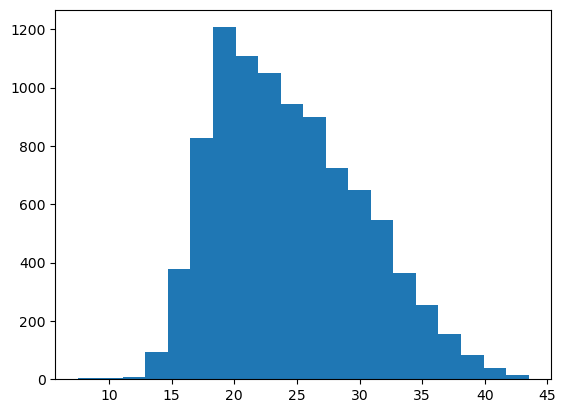

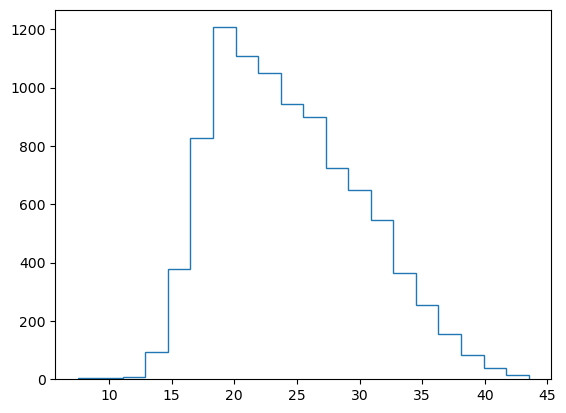

In [5]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

#print('Age when concieve: \n',agecon)
#print('\n\n\nAge while pregnancy:\n',agepreg)

# Compute the difference
preg_length = agepreg - agecon

#print('\n\nPregnency Length:\n', preg_length)

# Compute summary statistics
#print('\n\n\n', preg_length.describe())

import matplotlib.pyplot as plt

### Part 1: Plot a histogram of agecon with 20 bins.
plt.hist(agecon, bins=20)
plt.show()

### Part 2: Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

plt.hist(agecon, bins=20, histtype='step')

plt.show()

## Example 2: Compute birth weight
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

#### Resample the data
    
    nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

#### Clean the weight variables
    
    pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
    ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

#### Compute total birth weight
    
    birth_weight = pounds + ounces/16
    
### Steps: 
1. Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
2. Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
3. Compute the mean weight of full-term babies.

In [7]:
full_term = nsfg['prglngth'] >=37

full_term_weight = birth_weight[full_term]

print(full_term_weight.mean() )

7.422858312113496


## Example 3: Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

### Steps: 
1. Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
2. Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
3. For comparison, select multiple, full-term babies and compute their mean birth weight.

In [16]:

full_term = nsfg['prglngth'] >=37

# Filter single birth

single = nsfg['nbrnaliv'] ==1

# Compute birth weight for single full-term babies

birth_weight_single = birth_weight[single & full_term]
print( 'Avg wt for single birth: ', birth_weight_single.mean())

# Compute birth weight for multiple full-term babies
birth_weight_multiple = birth_weight[~single & full_term]

print( '\n\nAvg wt for multiple birth:', birth_weight_multiple.mean())


Avg wt for single birth:  7.4187798055759355


Avg wt for multiple birth: 7.90625
